In [355]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium

In [356]:
df = pd.read_csv('../data/global_rivers_dataset.csv')
print(df.head())
print(df.info())

  river_name  river_length_km    source_lat    source_lon     mouth_lat  \
0     Rungwa       302.552145 -8.038326e+05  3.562224e+06 -8.038435e+05   
1    Ligonha       339.003357 -1.892915e+06  4.355690e+06 -1.703609e+06   
2     Dongwe       259.307674 -1.630475e+06  2.842354e+06 -1.559692e+06   
3      Cuito       764.221869 -2.024344e+06  2.309879e+06 -1.419870e+06   
4      Bagoé       466.222413  1.042907e+06 -7.730508e+05  1.296021e+06   

      mouth_lon             countries_passed continent  \
0  3.562224e+06  United Republic of Tanzania    Africa   
1  4.160865e+06                   Mozambique    Africa   
2  2.664439e+06                       Zambia    Africa   
3  2.041473e+06              Angola, Namibia    Africa   
4 -7.303820e+05            Ivory Coast, Mali    Africa   

                  main_country length_category  
0  United Republic of Tanzania           Short  
1                   Mozambique           Short  
2                       Zambia           Short  
3   

In [357]:
# Missing values are checked for each column
print("Missing values:\n", df.isna().sum())

Missing values:
 river_name          0
river_length_km     0
source_lat          0
source_lon          0
mouth_lat           0
mouth_lon           0
countries_passed    0
continent           0
main_country        0
length_category     0
dtype: int64


In [358]:
#number of rivers in each continent
river_count_by_continent = df["continent"].value_counts()
print(river_count_by_continent)

continent
North America    330
Europe           319
Asia             268
Africa           218
South America    149
Oceania          103
Name: count, dtype: int64


In [359]:
#average river length for each continent
avg_length_by_continent = df.groupby("continent")["river_length_km"].mean()
print(avg_length_by_continent)

continent
Africa           496.266690
Asia             588.629933
Europe           879.656895
North America    545.362963
Oceania          208.962998
South America    702.811497
Name: river_length_km, dtype: float64


In [360]:
#the top 10 longest rivers
top_rivers_by_length = df.nlargest(10, "river_length_km")[["river_name", "river_length_km"]]
print(top_rivers_by_length)

          river_name  river_length_km
705             Lena      8546.624429
1365           Yukon      6316.047696
540           Olenëk      5798.862238
578   Lower Tunguska      5505.924178
616           Kolyma      4960.321130
644            Huang      4609.768331
639            Niger      4589.678489
499           Vilyuy      4430.012600
608          Yenisey      4208.033832
601            Aldan      4172.429459


In [361]:
#number of rivers in each length category
length_cat_count = df["length_category"].value_counts()
print(length_cat_count)

length_category
Short     815
Medium    513
Long       59
Name: count, dtype: int64


In [362]:
#average source coordinates per continent
avg_source_coords = df.groupby("continent")[["source_lat", "source_lon"]].mean()
print(avg_source_coords)

                 source_lat    source_lon
continent                                
Africa        -1.824473e+05  2.413865e+06
Asia           3.515053e+06  1.041582e+07
Europe         7.683393e+06  5.681488e+06
North America  5.467524e+06 -1.099083e+07
Oceania       -4.138989e+06  1.776004e+07
South America -1.689703e+06 -6.768312e+06


In [363]:
#Total river length per main country
total_length_by_country = df.groupby("main_country")["river_length_km"].sum()
print(total_length_by_country)

main_country
Afghanistan     3613.683543
Albania          391.607009
Angola          5799.295541
Argentina      17239.291859
Australia      11557.740653
                   ...     
Uzbekistan      2969.954047
Venezuela       5808.842085
Vietnam         1857.290645
Zambia          6546.558769
Zimbabwe        1867.081120
Name: river_length_km, Length: 123, dtype: float64


In [364]:
#number of countries they pass through
countries_passed_count = df["countries_passed"].str.split(", ").apply(len).value_counts()
print(countries_passed_count)

countries_passed
1    1106
2     214
3      52
4      11
5       2
7       1
6       1
Name: count, dtype: int64


In [365]:
#River that passes through the highest number of countries
max_countries_river = df.loc[df["countries_passed"].str.split(", ").apply(len).idxmax(), ["river_name", "countries_passed"]]
print(max_countries_river)

river_name                                                    Zambezi
countries_passed    Angola, Botswana, Democratic Republic of the C...
Name: 648, dtype: object


In [366]:
#average length of rivers in Africa
avg_length_africa = df[df["continent"] == "Africa"]["river_length_km"].mean()
print(f"Average River Length in Africa: {avg_length_africa:.2f} km")

Average River Length in Africa: 496.27 km


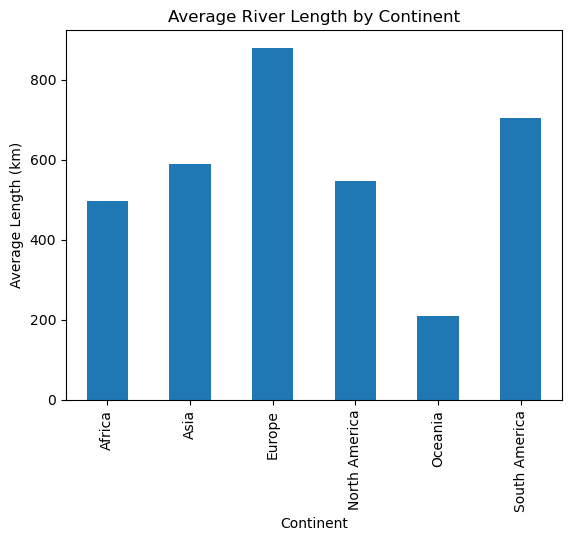

In [367]:
df.groupby("continent")["river_length_km"].mean().plot(kind="bar")
plt.title("Average River Length by Continent")
plt.xlabel("Continent")
plt.ylabel("Average Length (km)")
plt.show()

In [368]:
#rivers by main country
main_country_count = df["main_country"].value_counts()
print(main_country_count)

main_country
Russia                      173
United States of America    161
Canada                      117
China                       110
Brazil                       75
                           ... 
Guinea                        1
Equatorial Guinea             1
Jordan                        1
Mauritania                    1
Honduras                      1
Name: count, Length: 123, dtype: int64


In [369]:
#average mouth coordinates per continent
avg_mouth_coords = df.groupby("continent")[["mouth_lat", "mouth_lon"]].mean()
print(avg_mouth_coords)

                  mouth_lat     mouth_lon
continent                                
Africa        -1.858833e+05  2.392007e+06
Asia           3.460783e+06  1.044506e+07
Europe         7.777293e+06  5.710170e+06
North America  5.435083e+06 -1.095321e+07
Oceania       -4.124674e+06  1.773346e+07
South America -1.618015e+06 -6.622104e+06


In [370]:
#Number of rivers longer than 500 km
long_rivers_count = len(df[df["river_length_km"] > 500])
print(f"Rivers Longer than 500 km: {long_rivers_count}")

Rivers Longer than 500 km: 572


In [371]:
#Average river length for each length category
avg_length_by_cat = df.groupby("length_category")["river_length_km"].mean()
print(avg_length_by_cat)

length_category
Long      3082.465560
Medium     939.079392
Short      232.083673
Name: river_length_km, dtype: float64


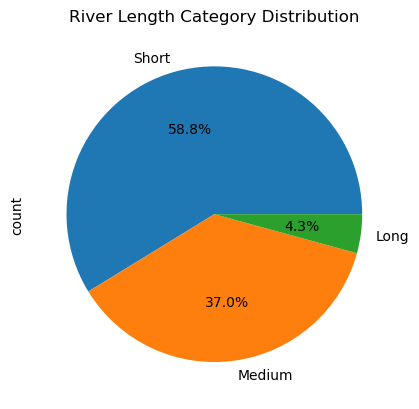

In [372]:
df["length_category"].value_counts().plot(kind="pie", autopct='%1.1f%%')
plt.title("River Length Category Distribution")
plt.show()

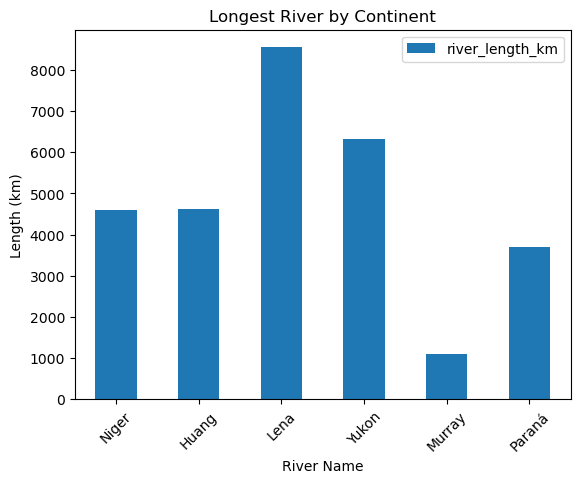

In [480]:
top_idx = df.groupby("continent")["river_length_km"].idxmax()
top_rivers_continent = df.loc[top_idx]

top_rivers_continent.plot(x="river_name", y="river_length_km", kind="bar")
plt.title("Longest River by Continent")
plt.xlabel("River Name")
plt.ylabel("Length (km)")
plt.xticks(rotation=45)
plt.show()

In [482]:
#Top 5 continents by average river length
top_continents_by_length = df.groupby("continent")["river_length_km"].mean().nlargest(5)
print(top_continents_by_length)

continent
Europe           879.656895
South America    702.811497
Asia             588.629933
North America    545.362963
Africa           496.266690
Name: river_length_km, dtype: float64


In [375]:
#Average coordinates (source and mouth) for a specific river
rungwa_coords = df[df["river_name"] == "Rungwa"][["source_lat", "source_lon", "mouth_lat", "mouth_lon"]].mean()
print(f"Rungwa Average Coordinates: {rungwa_coords}")

Rungwa Average Coordinates: source_lat   -8.038326e+05
source_lon    3.562224e+06
mouth_lat    -8.038435e+05
mouth_lon     3.562224e+06
dtype: float64


In [376]:
#Total river length per continent
total_length_by_continent = df.groupby("continent")["river_length_km"].sum()
print(total_length_by_continent)

continent
Africa           108186.138471
Asia             157752.822091
Europe           280610.549447
North America    179969.777697
Oceania           21523.188836
South America    104718.912992
Name: river_length_km, dtype: float64


In [377]:
#Minimum river length in each continent
min_length_by_continent = df.groupby("continent")["river_length_km"].min()
print(min_length_by_continent)

continent
Africa            3.145794
Asia              8.648038
Europe            3.933863
North America     9.987952
Oceania           3.230623
South America    10.815222
Name: river_length_km, dtype: float64


In [378]:
#Average number of countries rivers pass through in each continent
avg_countries_by_continent = df.groupby("continent")["countries_passed"].apply(lambda x: x.str.split(", ").apply(len).mean())
print(avg_countries_by_continent)

continent
Africa           1.504587
Asia             1.332090
Europe           1.304075
North America    1.087879
Oceania          1.019417
South America    1.288591
Name: countries_passed, dtype: float64


In [379]:
#rivers classified as Medium in length category
hybrid_rivers_count = len(df[df["length_category"] == "Medium"])
print(f"Medium Length Rivers: {hybrid_rivers_count}")

Medium Length Rivers: 513


In [380]:
#Average source coordinates for rivers longer than 300 km
long_rivers_source = df[df["river_length_km"] > 300][["source_lat", "source_lon"]].mean()
print(f"Average Source Coordinates for Rivers > 300 km: {long_rivers_source}")

Average Source Coordinates for Rivers > 300 km: source_lat    3.741821e+06
source_lon    1.285403e+06
dtype: float64


In [450]:
# Longest river in Sudan
sudan_river = df[df["main_country"] == "Sudan"].nlargest(1, "river_length_km")[["river_name", "river_length_km"]]
print(sudan_river)

    river_name  river_length_km
696       Nile      2561.763539


In [452]:
#earch for Specific Country 
df[df['countries_passed'].str.contains("Sudan")]

,river_name,river_length_km,source_lat,source_lon,mouth_lat,mouth_lon,countries_passed,continent,main_country,length_category,lat_diff,lon_diff
48,Kangen,284.082958,6.008701e+05,3.872592e+06,7.400657e+05,3.699009e+06,South Sudan,Africa,South Sudan,Short,1.391957e+05,173583.395434
91,Pibor,151.660385,8.749342e+05,3.673190e+06,7.400657e+05,3.699009e+06,"Ethiopia, South Sudan",Africa,South Sudan,Short,1.348685e+05,25818.729554
350,Akobo,446.249725,7.469433e+05,3.991152e+06,8.783006e+05,3.672347e+06,"Ethiopia, South Sudan",Africa,Ethiopia,Short,1.313572e+05,318804.237012
446,Sobat,387.947267,9.364820e+05,3.695905e+06,9.364820e+05,3.696671e+06,"Ethiopia, South Sudan",Africa,South Sudan,Short,0.000000e+00,766.408604
492,Atbara,38.629631,1.634626e+06,3.995859e+06,1.670769e+06,3.996544e+06,Sudan,Africa,Sudan,Short,3.614317e+04,684.875773
493,Atbara,431.533965,1.670769e+06,3.996544e+06,1.792954e+06,3.961126e+06,Sudan,Africa,Sudan,Short,1.221846e+05,35417.861426
548,Setit,322.559797,1.549675e+06,4.209730e+06,1.634626e+06,3.995859e+06,"Eritrea, Ethiopia, Sudan",Africa,Ethiopia,Short,8.495141e+04,213871.484582
555,Bahr el Zeraf,226.134951,1.047039e+06,3.466385e+06,8.615312e+05,3.399223e+06,South Sudan,Africa,South Sudan,Short,1.855080e+05,67161.309973
653,El Bahr el Azraq,75.580518,1.257378e+06,3.871423e+06,1.312311e+06,3.827124e+06,Sudan,Africa,Sudan,Short,5.493278e+04,44299.504393
654,El Bahr el Azraq,816.859292,1.128225e+06,3.935236e+06,1.750706e+06,3.616644e+06,"Ethiopia, Sudan",Africa,Sudan,Medium,6.224805e+05,318592.251654


In [383]:
# Longest river in Ireland
ireland_river = df[df["main_country"] == "Ireland"].nlargest(1, "river_length_km")[["river_name", "river_length_km"]]
print(ireland_river)

    river_name  river_length_km
769    Shannon       245.975123


In [384]:
#Average river length for rivers crossing more than one country
multi_country_avg_length = df[df["countries_passed"].str.contains(",")]["river_length_km"].mean()
print(f"Avg Length of Multi-Country Rivers: {multi_country_avg_length:.2f} km")

Avg Length of Multi-Country Rivers: 841.57 km


In [385]:
#multi-country rivers in Africa
africa_multi_country = len(df[(df["continent"] == "Africa") & (df["countries_passed"].str.contains(","))])
print(f"Multi-Country Rivers in Africa: {africa_multi_country}")

Multi-Country Rivers in Africa: 82


In [386]:
#Average mouth coordinates for short rivers
short_rivers_mouth = df[df["length_category"] == "Short"][["mouth_lat", "mouth_lon"]].mean()
print(f"Average Mouth Coordinates for Short Rivers: {short_rivers_mouth}")

Average Mouth Coordinates for Short Rivers: mouth_lat    2.520558e+06
mouth_lon    1.947937e+06
dtype: float64


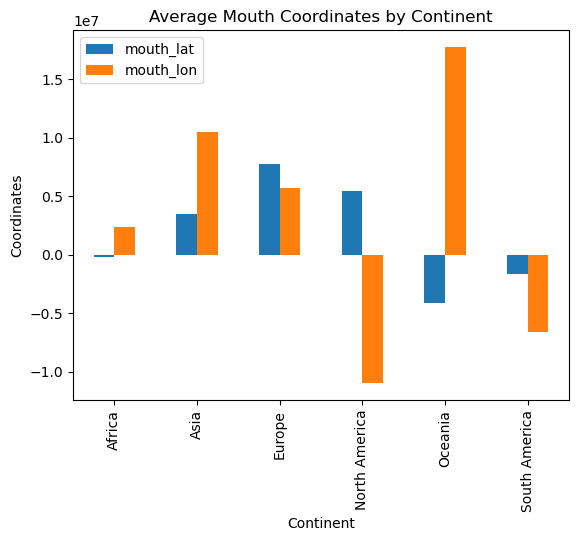

In [468]:
df.groupby("continent")[["mouth_lat", "mouth_lon"]].mean().plot(kind="bar")
plt.title("Average Mouth Coordinates by Continent")
plt.xlabel("Continent")
plt.ylabel("Coordinates")
plt.show()

In [387]:
#Top 10 rivers by difference between source and mouth coordinates
df['lat_diff'] = abs(df['source_lat'] - df['mouth_lat'])
df['lon_diff'] = abs(df['source_lon'] - df['mouth_lon'])
top_distance_rivers = df.nlargest(10, ['lat_diff', 'lon_diff'])[["river_name", "lat_diff", "lon_diff"]]
print(top_distance_rivers)

          river_name      lat_diff      lon_diff
705             Lena  4.682971e+06  2.082745e+06
608          Yenisey  3.103515e+06  1.093301e+06
582        Indigirka  2.495448e+06  5.590543e+05
681           Paraná  2.378778e+06  4.576519e+05
1378       Mackenzie  2.040299e+06  1.911119e+06
935            Volga  1.907710e+06  1.696878e+06
578   Lower Tunguska  1.831410e+06  1.973421e+06
616           Kolyma  1.789615e+06  1.730138e+06
540           Olenëk  1.759961e+06  1.738421e+06
683          Lancang  1.732687e+06  5.145483e+05


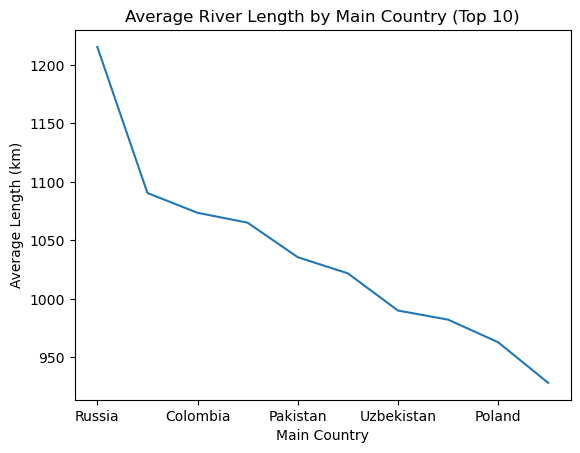

In [388]:
df.groupby("main_country")["river_length_km"].mean().nlargest(10).plot(kind="line")
plt.title("Average River Length by Main Country (Top 10)")
plt.xlabel("Main Country")
plt.ylabel("Average Length (km)")
plt.show()

In [476]:
# Will create map with average coordinates
m = folium.Map(location=[df['source_lat'].mean(), df['source_lon'].mean()], zoom_start=2)

#one river as example
folium.Marker(
    location=[df.iloc[0]['source_lat'], df.iloc[0]['source_lon']],
    popup="River Source"
).add_to(m)
m

In [390]:
#function to extract river information based on its name
def get_river_info(river_name):
    #the specific river and select the first match
    river = df[df["river_name"] == river_name].iloc[0]
    
    #dictionary with selected river details
    info = {
        "River Name": river["river_name"],
        "Length (km)": river["river_length_km"],
        "Continent": river["continent"],
        "Countries Passed": river["countries_passed"],
        "Source Coordinates": (river["source_lat"], river["source_lon"]),
        "Mouth Coordinates": (river["mouth_lat"], river["mouth_lon"])
    }
    return info

# Exampl Retrieve information about the Nile River
nile_info = get_river_info("Nile")
print(nile_info)


{'River Name': 'Nile', 'Length (km)': 2561.763538872077, 'Continent': 'Africa', 'Countries Passed': 'Egypt, Sudan', 'Source Coordinates': (2081416.8197280483, 3750716.7376957503), 'Mouth Coordinates': (3498038.3719413616, 3477277.367390747)}


In [391]:
# General River Statistics
def get_rivers_stats():
    stats = {
        "Total Rivers": len(df),
        "Longest River": df.loc[df["river_length_km"].idxmax()]["river_name"],
        "Average Length": df["river_length_km"].mean(),
        "Rivers Crossing Multiple Countries": len(df[df["countries_passed"].str.contains(",")]),
        "Continent with Most Rivers": df["continent"].value_counts().idxmax()
    }
    return stats

print(get_rivers_stats())

{'Total Rivers': 1387, 'Longest River': 'Lena', 'Average Length': 614.8243615957364, 'Rivers Crossing Multiple Countries': 281, 'Continent with Most Rivers': 'North America'}


In [392]:
#Filter Rivers by Length

def filter_rivers_by_length(min_length, max_length):
    filtered = df[(df["river_length_km"] >= min_length) & (df["river_length_km"] <= max_length)]
    return filtered[["river_name", "river_length_km", "continent"]]

# Example for rivers between 500-1000 km
print(filter_rivers_by_length(500, 1000))

        river_name  river_length_km      continent
3            Cuito       764.221869         Africa
7      Oum Er Rbia       506.372279         Africa
8       San Miguel       748.734513  South America
19         Cojedes       552.292571  South America
20          Vaupés       729.383643  South America
...            ...              ...            ...
1358     La Grande       733.316398  North America
1362  Saskatchewan       704.876896  North America
1367        Teslin       519.815010  North America
1370     Allegheny       567.426425  North America
1379         Slave       833.799728  North America

[340 rows x 3 columns]


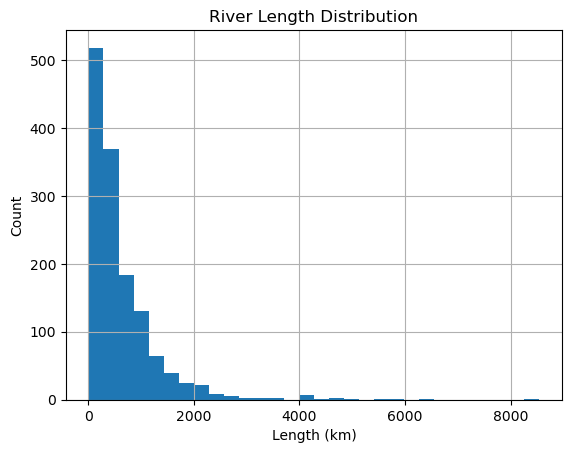

In [436]:
df['river_length_km'].hist(bins=30)
plt.title("River Length Distribution")
plt.xlabel("Length (km)")
plt.ylabel("Count")
plt.show()

<Axes: xlabel='country_count', ylabel='river_length_km'>

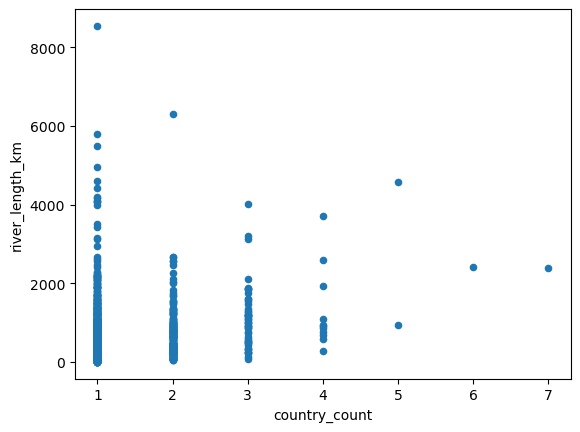

In [466]:
#River Length vs Number of Countries Passed
df['country_count'] = df['countries_passed'].str.count(',') + 1
df.plot.scatter(x='country_count', y='river_length_km')